In [43]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup


In [28]:
#cols = ['sentiment','id','date','query_string','user','text']
#df = pd.read_csv("F:/web mining/webmining project/crawler/annotation_data/Samsung_with date_Merged_final.",header=None)
df = pd.read_excel("F:/web mining/webmining project/crawler/annotation_data/samsung/Merged_final.xlsx")
# above line will be different depending on where you saved your data, and your file name


In [29]:
df.head()

,id,date,text_original,permalink,Brand,text_preprocessed,polarity,polarity_confidence,subjectivity,subjectivity_confidence,polarityNum
0,925495649730117632,2017-10-31 23:52,# phone gear Anti Gravity Casing for iPhone an...,https://twitter.com/MyPhoneMyWorld/status/9254...,Samsung,phone gear anti gravity casing iphone samsung ...,neutral,0.972387,objective,0.999999,0
1,925490587402465280,2017-10-31 23:32,Went to the cell phone repair place and they s...,https://twitter.com/SinamonLance/status/925490...,Samsung,went cell phone repair place said d need conta...,negative,0.785670,subjective,1.000000,-1
2,925476232380145664,2017-10-31 22:35,"Great uses for ""defunct"" phones. The ""reuse"" p...",https://twitter.com/cosmo_nz/status/9254762323...,Samsung,great us defunct phone reuse part reuse reduce...,neutral,0.664289,objective,0.999453,0
3,925473978625548288,2017-10-31 22:26,Samsung Galaxy A5 2018 Full Phone Specificatio...,https://twitter.com/entclassblog/status/925473...,Samsung,samsung galaxy full phone specification price ...,neutral,0.865111,objective,1.000000,0
4,925472949150380032,2017-10-31 22:22,"damn, and with Apple breaking their iOS, samsu...",https://twitter.com/mcdroidgame/status/9254729...,Samsung,damn apple breaking io samsung overloading cra...,negative,0.494093,subjective,0.999850,-1


In [30]:
df.polarity.value_counts()

positive    11097
negative    11097
neutral     11096
Name: polarity, dtype: int64

In [31]:
main_df = df[['polarity','text_original']]
main_df.head()

,polarity,text_original
0,neutral,# phone gear Anti Gravity Casing for iPhone an...
1,negative,Went to the cell phone repair place and they s...
2,neutral,"Great uses for ""defunct"" phones. The ""reuse"" p..."
3,neutral,Samsung Galaxy A5 2018 Full Phone Specificatio...
4,negative,"damn, and with Apple breaking their iOS, samsu..."


In [33]:
df['pre_clean_len'] = [len(t) for t in df.text_original]

In [37]:
from pprint import pprint
data_dict = {
    'polarity':{
        'type':df.polarity.dtype,
        'description':'polarity class - -1:negative, 0: neutral,1:positive'
    },
    'text_original':{
        'type':df.text_original.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}
pprint(data_dict)

{'dataset_shape': (33290, 12),
 'polarity': {'description': 'polarity class - -1:negative, 0: '
                             'neutral,1:positive',
              'type': dtype('O')},
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'text_original': {'description': 'tweet text', 'type': dtype('O')}}


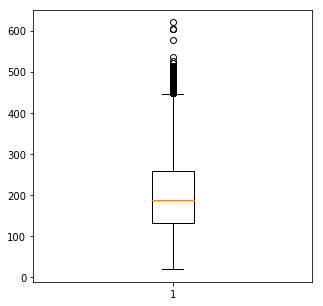

In [38]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [39]:
df[df.pre_clean_len > 140].head(10)

,id,date,text_original,permalink,Brand,text_preprocessed,polarity,polarity_confidence,subjectivity,subjectivity_confidence,polarityNum,pre_clean_len
0,925495649730117632,2017-10-31 23:52,# phone gear Anti Gravity Casing for iPhone an...,https://twitter.com/MyPhoneMyWorld/status/9254...,Samsung,phone gear anti gravity casing iphone samsung ...,neutral,0.972387,objective,0.999999,0,182
2,925476232380145664,2017-10-31 22:35,"Great uses for ""defunct"" phones. The ""reuse"" p...",https://twitter.com/cosmo_nz/status/9254762323...,Samsung,great us defunct phone reuse part reuse reduce...,neutral,0.664289,objective,0.999453,0,187
5,925468959373185024,2017-10-31 22:06,Teardown of Huawei Mate 10 - the 2nd or 3rd bi...,https://twitter.com/StephenNellis/status/92546...,Samsung,teardown huawei mate biggest phone maker depen...,neutral,0.642319,objective,0.961751,0,199
16,925430926389133312,2017-10-31 19:35,Samsung's pathological insistence on not cente...,https://twitter.com/ericemoji/status/925430926...,Samsung,samsung s pathological insistence centering po...,negative,0.693223,objective,0.999522,-1,155
28,925411249810214912,2017-10-31 18:16,nahh im happy with my beautiful samsung phone ...,https://twitter.com/vvicotine/status/925411249...,Samsung,nahh im happy beautiful samsung phone screen l...,positive,0.999298,subjective,1.000000,1,149
29,925410764512522240,2017-10-31 18:14,Samsung Gear VR Virtual Reality Headset for No...,https://twitter.com/AmazonShowcase/status/9254...,Samsung,samsung gear vr virtual reality headset note e...,neutral,0.824535,objective,0.999528,0,166
30,925410763946315776,2017-10-31 18:14,Samsung Gear VR Virtual Reality Headset for No...,https://twitter.com/coolshowcase/status/925410...,Samsung,samsung gear vr virtual reality headset note e...,neutral,0.824535,objective,0.999989,0,166
32,925396509402599424,2017-10-31 17:18,"@ SamsungMobile are useless, sat around all da...",https://twitter.com/CJUKOfficial/status/925396...,Samsung,samsungmobile useless sat around day next day ...,negative,0.996469,objective,0.999993,-1,141
34,925394746390048768,2017-10-31 17:11,Our phone of the day is this Samsung Galaxy S8...,https://twitter.com/GAMEstaustell/status/92539...,Samsung,phone day samsung galaxy plus ee spread cost i...,neutral,0.624406,objective,0.999136,0,162
37,925389637153062912,2017-10-31 16:50,"Payday is here! And so is this wonderful, unlo...",https://twitter.com/GAMEBasing/status/92538963...,Samsung,payday wonderful unlocked great condition sams...,positive,0.998245,subjective,1.000000,1,161


In [44]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text_original):
    soup = BeautifulSoup(text_original, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.text_original[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result


['phone gear anti gravity casing for iphone and samsung accessor accessories online shop anti gravity casing iphone samsung pic twitter com jsz jwbkfc',
 'went to the cell phone repair place and they said i d need to contact samsung because it d be very difficult for them to get the part i need',
 'great uses for defunct phones the reuse part of reuse reduce and recycle in the tech world well done samsung bitcoin mining rig',
 'samsung galaxy a full phone specifications and price pic twitter com gt i gwaq',
 'damn and with apple breaking their ios samsung overloading crapware not much to turn to except older phones',
 'teardown of huawei mate the nd or rd biggest phone maker depending on q samsung wins nand and micron dram techinsights overview blog huawei mate teardown',
 'samsungmobile your phone is trash i dropped my s from inches in the air with a case and i now have a chipped phone',
 'sir can i get a oneplus for free i really very love your phone even more then samsung and iphone

In [56]:
nums = [0,33290]
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%1000 == 0 ):
        print("Tweets %d of %d has been processed" % ( i+1, nums[1] ))                                                                  
    clean_tweet_texts.append(tweet_cleaner(df['text_original'][i]))

Cleaning and parsing the tweets...

Tweets 1000 of 33290 has been processed
Tweets 2000 of 33290 has been processed
Tweets 3000 of 33290 has been processed
Tweets 4000 of 33290 has been processed
Tweets 5000 of 33290 has been processed
Tweets 6000 of 33290 has been processed
Tweets 7000 of 33290 has been processed
Tweets 8000 of 33290 has been processed
Tweets 9000 of 33290 has been processed
Tweets 10000 of 33290 has been processed
Tweets 11000 of 33290 has been processed
Tweets 12000 of 33290 has been processed
Tweets 13000 of 33290 has been processed
Tweets 14000 of 33290 has been processed
Tweets 15000 of 33290 has been processed
Tweets 16000 of 33290 has been processed
Tweets 17000 of 33290 has been processed
Tweets 18000 of 33290 has been processed
Tweets 19000 of 33290 has been processed
Tweets 20000 of 33290 has been processed
Tweets 21000 of 33290 has been processed
Tweets 22000 of 33290 has been processed
Tweets 23000 of 33290 has been processed
Tweets 24000 of 33290 has been

In [57]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text_original'])
clean_df['target'] = df.polarity
clean_df

,text_original,target
0,phone gear anti gravity casing for iphone and ...,neutral
1,went to the cell phone repair place and they s...,negative
2,great uses for defunct phones the reuse part o...,neutral
3,samsung galaxy a full phone specifications and...,neutral
4,damn and with apple breaking their ios samsung...,negative
5,teardown of huawei mate the nd or rd biggest p...,neutral
6,samsungmobile your phone is trash i dropped my...,negative
7,sir can i get a oneplus for free i really very...,positive
8,samsungmobileus samsung samsungmobile has the ...,negative
9,it has also been rumoured that samsung may do ...,neutral


In [58]:
clean_df.to_csv('F:/web mining/webmining project/crawler/annotation_data/samsung/LR_clean_tweet.csv',encoding='utf-8')
csv = 'F:/web mining/webmining project/crawler/annotation_data/samsung/LR_clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text_original,target
0,phone gear anti gravity casing for iphone and ...,neutral
1,went to the cell phone repair place and they s...,negative
2,great uses for defunct phones the reuse part o...,neutral
3,samsung galaxy a full phone specifications and...,neutral
4,damn and with apple breaking their ios samsung...,negative


In [59]:
my_df.target.value_counts()

positive    11097
negative    11097
neutral     11096
Name: target, dtype: int64

# part 2 skip every thing till  logistic regression section

this was for my ref


In [60]:
#wait 

# recleaning 

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text_original):
    soup = BeautifulSoup(text_original, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [200]:
csv = 'F:/web mining/webmining project/crawler/annotation_data/samsung/LR_clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text_original,target
0,phone gear anti gravity casing for iphone and ...,neutral
1,went to the cell phone repair place and they s...,negative
2,great uses for defunct phones the reuse part o...,neutral
3,samsung galaxy a full phone specifications and...,neutral
4,damn and with apple breaking their ios samsung...,negative


In [201]:
my_df.columns = ['text', 'polarity']
my_df.head()



,text,polarity
0,phone gear anti gravity casing for iphone and ...,neutral
1,went to the cell phone repair place and they s...,negative
2,great uses for defunct phones the reuse part o...,neutral
3,samsung galaxy a full phone specifications and...,neutral
4,damn and with apple breaking their ios samsung...,negative


In [202]:


my_df.insert(2,'target','0')
my_df.head()



,text,polarity,target
0,phone gear anti gravity casing for iphone and ...,neutral,0
1,went to the cell phone repair place and they s...,negative,0
2,great uses for defunct phones the reuse part o...,neutral,0
3,samsung galaxy a full phone specifications and...,neutral,0
4,damn and with apple breaking their ios samsung...,negative,0


In [203]:
for i in range(0, len(my_df)):
    if  my_df.loc[i]['polarity'] == 'negative':
        my_df.at[i, 'target'] = -1
    elif my_df.loc[i]['polarity'] == 'positive':
        my_df.at[i, 'target'] = 1
    else:
        my_df.at[i, 'target'] = 0

In [205]:
my_df.head()

,text,polarity,target
0,phone gear anti gravity casing for iphone and ...,neutral,0
1,went to the cell phone repair place and they s...,negative,-1
2,great uses for defunct phones the reuse part o...,neutral,0
3,samsung galaxy a full phone specifications and...,neutral,0
4,damn and with apple breaking their ios samsung...,negative,-1


In [206]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33290 entries, 0 to 33289
Data columns (total 3 columns):
text        33290 non-null object
polarity    33290 non-null object
target      33290 non-null object
dtypes: object(3)
memory usage: 2.3+ MB


In [207]:
#check if any null entries exist
my_df[my_df.isnull().any(axis=1)].head()

,text,polarity,target


In [208]:
np.sum(my_df.isnull().any(axis=1))

0

In [209]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [210]:
len(cvec.get_feature_names())
#count vectorizer has extracted 38058 words out of the corpus.

38058

In [211]:
neg_doc_matrix = cvec.transform(my_df[my_df.target == -1].text)
nut_doc_matrix = cvec.transform(my_df[my_df.target == 0].text)
pos_doc_matrix = cvec.transform(my_df[my_df.target == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
nut_tf = np.sum(nut_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
nut = np.squeeze(np.asarray(nut_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,nut,pos],columns=cvec.get_feature_names()).transpose()


In [212]:
#term_freq_df.head()
document_matrix = cvec.transform(my_df.text)
my_df[my_df.target == 0].tail()

,text,polarity,target
33259,played with the samsung today and it beats out...,neutral,0
33262,next apple and samsung need to ban smart phone...,neutral,0
33270,samsung is about to put out the best phone cam...,neutral,0
33271,smartphone owners to samsung and apple please ...,neutral,0
33288,samsung annonce new phone each month or unlike...,neutral,0


In [213]:
%%time
neg_batches = np.linspace(0,11097,100).astype(int)
i=0
neg_tf = []
while i < len(neg_batches)-1:
    batch_result = np.sum(document_matrix[neg_batches[i]:neg_batches[i+1]].toarray(),axis=0)
    neg_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(neg_batches)-2):
        print(neg_batches[i+1],"entries' term freuquency calculated")
    i += 1

112 entries' term freuquency calculated
1233 entries' term freuquency calculated
2353 entries' term freuquency calculated
3474 entries' term freuquency calculated
4595 entries' term freuquency calculated
5716 entries' term freuquency calculated
6837 entries' term freuquency calculated
7958 entries' term freuquency calculated
9079 entries' term freuquency calculated
10200 entries' term freuquency calculated
11097 entries' term freuquency calculated
Wall time: 2.2 s


In [214]:
my_df.tail()

,text,polarity,target
33285,technews first look at the galaxys and we re l...,positive,1
33286,best cases for samsung s hearing they break re...,negative,-1
33287,and did you know that the subpixel scheme on t...,negative,-1
33288,samsung annonce new phone each month or unlike...,neutral,0
33289,samsung phones are the technical best and fine...,positive,1


In [215]:
%%time
nut_batches = np.linspace(11097,22194,100).astype(int)
i=0
nut_tf = []
while i < len(nut_batches)-1:
    batch_result = np.sum(document_matrix[nut_batches[i]:nut_batches[i+1]].toarray(),axis=0)
    nut_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(nut_batches)-2):
        print(nut_batches[i+1],"entries' term freuquency calculated")
    i += 1

11209 entries' term freuquency calculated
12330 entries' term freuquency calculated
13450 entries' term freuquency calculated
14571 entries' term freuquency calculated
15692 entries' term freuquency calculated
16813 entries' term freuquency calculated
17934 entries' term freuquency calculated
19055 entries' term freuquency calculated
20176 entries' term freuquency calculated
21297 entries' term freuquency calculated
22194 entries' term freuquency calculated
Wall time: 1.89 s


In [216]:
%%time
pos_batches = np.linspace(22194,33290,100).astype(int)
i=0
pos_tf = []
while i < len(pos_batches)-1:
    batch_result = np.sum(document_matrix[pos_batches[i]:pos_batches[i+1]].toarray(),axis=0)
    pos_tf.append(batch_result)
    if (i % 10 == 0) | (i == len(pos_batches)-2):
        print(pos_batches[i+1],"entries' term freuquency calculated")
    i += 1

22306 entries' term freuquency calculated
23426 entries' term freuquency calculated
24547 entries' term freuquency calculated
25668 entries' term freuquency calculated
26789 entries' term freuquency calculated
27910 entries' term freuquency calculated
29030 entries' term freuquency calculated
30151 entries' term freuquency calculated
31272 entries' term freuquency calculated
32393 entries' term freuquency calculated
33290 entries' term freuquency calculated
Wall time: 2.25 s


In [217]:
neg = np.sum(neg_tf,axis=0)
nut = np.sum(nut_tf,axis=0)
pos = np.sum(pos_tf,axis=0)
term_freq_df = pd.DataFrame([neg,nut,pos],columns=cvec.get_feature_names()).transpose()
term_freq_df.head()

,0,1,2
aa,3,4,3
aaa,0,2,0
aaaaa,0,0,1
aaaaaaaaaaaggggghhhhhh,0,1,0
aaaaaaaalllllll,0,0,1


In [218]:
term_freq_df.columns = ['negative','neutral','positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['neutral'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,neutral,positive,total
and,14094,15217,15349,44660
samsung,11946,12460,12443,36849
the,8823,11962,12256,33041
phone,9588,9830,10610,30028
to,5911,7361,7757,21029
it,5027,5085,5461,15573
my,4387,4408,4884,13679
for,3736,4671,5268,13675
is,3832,4310,4213,12355
phones,3849,4298,4040,12187


# Train / Dev / Test Split

In [219]:
from sklearn.cross_validation import train_test_split

x = my_df.text
y = my_df.target
SEED = 2000
#split 90%(train) and 10% (validation)
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.10, random_state=SEED)

In [220]:
#split validation into 50% each of 10%
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [221]:
print("Train set has total {0} entries with {1:.2f}% negative,{2:.2f}% neutral, {3:.2f}% positive".format(len(x_train),(len(x_train[y_train == -1]) / (len(x_train)*1.))*100,(len(x_train[y_train == 0]) / (len(x_train)*1.))*100,(len(x_train[y_train == 1]) / (len(x_train)*1.))*100))
print("Validation set has total {0} entries with {1:.2f}% negative,{2:.2f}% neutral, {3:.2f}% positive".format(len(x_validation),(len(x_validation[y_validation == -1]) / (len(x_validation)*1.))*100,(len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,(len(x_validation[y_validation == 1]) / (len(x_validation)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% negative,{2:.2f}% neutral, {3:.2f}% positive".format(len(x_test),(len(x_test[y_test == -1]) / (len(x_test)*1.))*100,(len(x_test[y_test == 0]) / (len(x_test)*1.))*100,(len(x_test[y_test == 1]) / (len(x_test)*1.))*100))

Train set has total 29961 entries with 33.40% negative,33.25% neutral, 33.35% positive
Validation set has total 1664 entries with 33.41% negative,34.44% neutral, 32.15% positive
Test set has total 1665 entries with 32.07% negative,33.63% neutral, 34.29% positive


# Baseline Zero Rule and textblob base line  

In [222]:
#predicts the majority category (class)

from textblob import TextBlob
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

tbresult = [TextBlob(i).sentiment.polarity for i in x_validation]
tbpred = [0 if n < 0 else 1 for n in tbresult]

#confusion matrix
conmat = np.array(confusion_matrix(y_validation, tbpred, labels=[-1,0,1]))

confusion = pd.DataFrame(conmat, index=['negative','neutral','positive'],
                         columns=['predicted_negative','predicted_neutral','predicted_positive'])

print("Accuracy Score: {0:.2f}%".format(accuracy_score(y_validation, tbpred)*100))
print("-"*80)
print("Confusion Matrix\n") 
print(confusion)
print("-"*80)
print("Classification Report\n")
print(classification_report(y_validation, tbpred))

ValueError: Can't handle mix of unknown and binary

In [225]:
#term_freq_df .head()
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,neutral,positive,total
and,14094,15217,15349,44660
samsung,11946,12460,12443,36849
the,8823,11962,12256,33041
phone,9588,9830,10610,30028
to,5911,7361,7757,21029
it,5027,5085,5461,15573
my,4387,4408,4884,13679
for,3736,4671,5268,13675
is,3832,4310,4213,12355
phones,3849,4298,4040,12187


In [227]:
from sklearn.feature_extraction import text
a = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))
b = text.ENGLISH_STOP_WORDS
set(a).issubset(set(b))

False

In [228]:
my_stop_words = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:10].index))

In [229]:
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')
print("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()
print("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)\n")
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)

RESULT FOR UNIGRAM WITHOUT STOP WORDS



NameError: name 'nfeature_accuracy_checker' is not defined

# logistic regression

In [280]:
#one of linear models, so computationally scalable to big data, compared to models like KNN or random forest.
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [281]:
csv = 'F:/web mining/webmining project/crawler/annotation_data/samsung/LR_clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text_original,target
0,phone gear anti gravity casing for iphone and ...,neutral
1,went to the cell phone repair place and they s...,negative
2,great uses for defunct phones the reuse part o...,neutral
3,samsung galaxy a full phone specifications and...,neutral
4,damn and with apple breaking their ios samsung...,negative


In [282]:
my_df.columns = ['text', 'polarity']
my_df.head()

,text,polarity
0,phone gear anti gravity casing for iphone and ...,neutral
1,went to the cell phone repair place and they s...,negative
2,great uses for defunct phones the reuse part o...,neutral
3,samsung galaxy a full phone specifications and...,neutral
4,damn and with apple breaking their ios samsung...,negative


In [283]:
my_df.insert(2,'target','0')
my_df.head()

,text,polarity,target
0,phone gear anti gravity casing for iphone and ...,neutral,0
1,went to the cell phone repair place and they s...,negative,0
2,great uses for defunct phones the reuse part o...,neutral,0
3,samsung galaxy a full phone specifications and...,neutral,0
4,damn and with apple breaking their ios samsung...,negative,0


In [284]:

for i in range(0, len(my_df)):
    if  my_df.loc[i]['polarity'] == 'negative':
        my_df.at[i, 'target'] = -1
    elif my_df.loc[i]['polarity'] == 'positive':
        my_df.at[i, 'target'] = 1
    else:
        my_df.at[i, 'target'] = 0

In [285]:
my_df.head()

,text,polarity,target
0,phone gear anti gravity casing for iphone and ...,neutral,0
1,went to the cell phone repair place and they s...,negative,-1
2,great uses for defunct phones the reuse part o...,neutral,0
3,samsung galaxy a full phone specifications and...,neutral,0
4,damn and with apple breaking their ios samsung...,negative,-1


In [286]:
#my_df = my_df[my_df['target'] != -1]


In [287]:
my_df = my_df.drop(['polarity'], axis=1)


In [289]:
my_df.head()

,text,target
0,phone gear anti gravity casing for iphone and ...,0
1,went to the cell phone repair place and they s...,-1
2,great uses for defunct phones the reuse part o...,0
3,samsung galaxy a full phone specifications and...,0
4,damn and with apple breaking their ios samsung...,-1


In [290]:
my_df['target'] = my_df['target'].astype(int)

In [291]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33290 entries, 0 to 33289
Data columns (total 2 columns):
text      33290 non-null object
target    33290 non-null int32
dtypes: int32(1), object(1)
memory usage: 390.2+ KB


In [292]:
x = my_df.text
y = my_df.target

In [293]:
from sklearn.cross_validation import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.10, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [294]:
x_train.head()
#y_train.head()

5804     samsungmobileus i just started using the samsu...
11247    well our biometrics have also reached apple sa...
9084     samsung stay throwing shade to make sales lmao...
10987    after leaning forward to plug my bathtub full ...
18794    the earphones that come with the samsung s are...
Name: text, dtype: object

In [295]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from  sklearn.feature_extraction.text import CountVectorizer

In [296]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    #print(type(y_pred))
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test,y_pred)
    print("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print("model has the same accuracy with the null accuracy")
    else:
        print("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    print("-"*80)
    return accuracy, train_test_time

In [297]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(1000,10001,1000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print((classifier))
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

# TFIDF Vectorizer

In [298]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [299]:
%%time
print("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(vectorizer=tvec)

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 65.56%
accuracy score: 71.03%
model is 5.47% more accurate than null accuracy
train and test time: 2.21s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 65.56%
accuracy score: 72.36%
model is 6.79% more accurate than null accuracy
train and test time: 2.03s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 65.56%
accuracy score: 72.72%
model is 7.15% more accurate than null accuracy
train and test time: 2.16s
-----------------------------------------------------------

In [ ]:
%%time
print("RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 65.56%
accuracy score: 69.65%
model is 4.09% more accurate than null accuracy
train and test time: 4.78s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 65.56%
accuracy score: 71.75%
model is 6.19% more accurate than null accuracy
train and test time: 4.57s
--------------------------------------------------------------------------------
Validation result for 3000 features


In [261]:
%%time
print("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 1000 features
null accuracy: 70.57%
accuracy score: 70.27%
model is 0.30% less accurate than null accuracy
train and test time: 9.10s
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 70.57%
accuracy score: 73.27%
model is 2.70% more accurate than null accuracy
train and test time: 8.52s
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 70.57%
accuracy score: 73.87%
model is 3.30% more accurate than null accuracy
train and test time: 8.75s
-----------------------------------------------------------

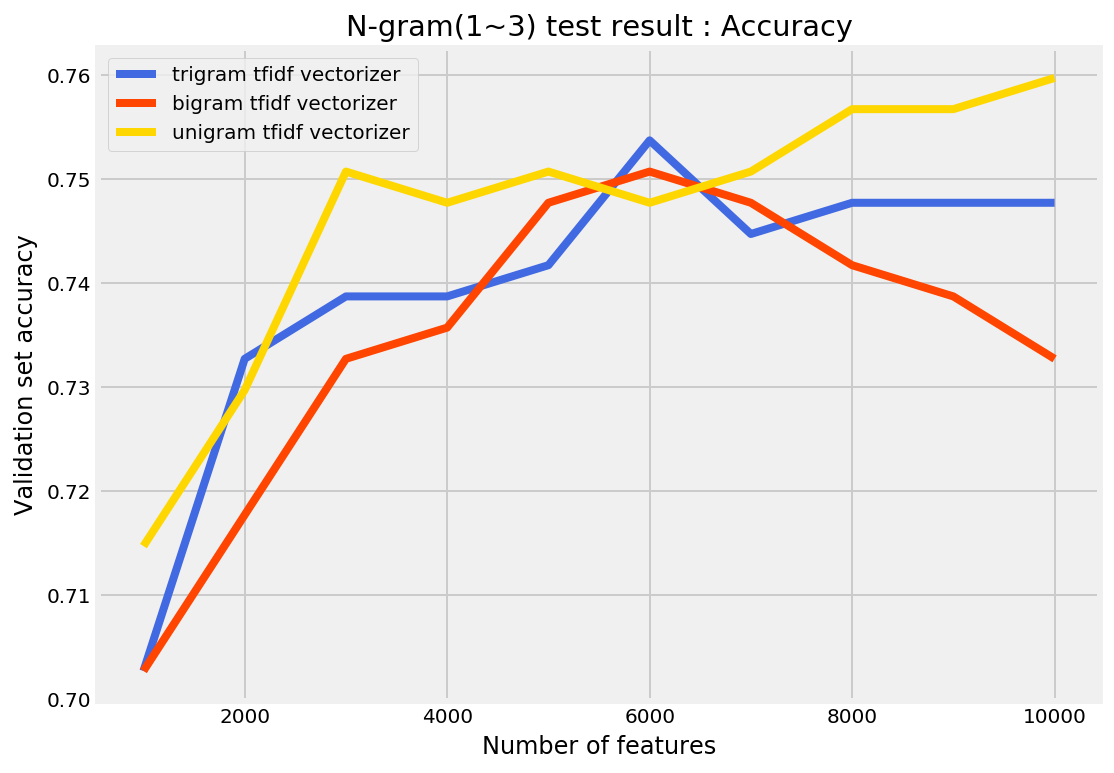

In [262]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy','train_test_time'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy','train_test_time'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
#plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
#plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
#plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()